In [148]:
%load_ext autoreload
%autoreload 2

import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import hashlib
import textwrap

from main import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
model_name = "bert-base-uncased"
tokenizer, model = load_model_and_tokenizer(model_name)
titles, texts = get_data()
embeddings = get_embeddings(tokenizer, model, texts)
embeddings_2d = reduce_dimensions(embeddings)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
metadata = embedding_metadata(embeddings_2d, titles, grid_size=10)


/var/folders/18/8z30tbys2w18jwwvm_wbbrhc0000gn/T/ipykernel_68223/3167644232.py:6: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



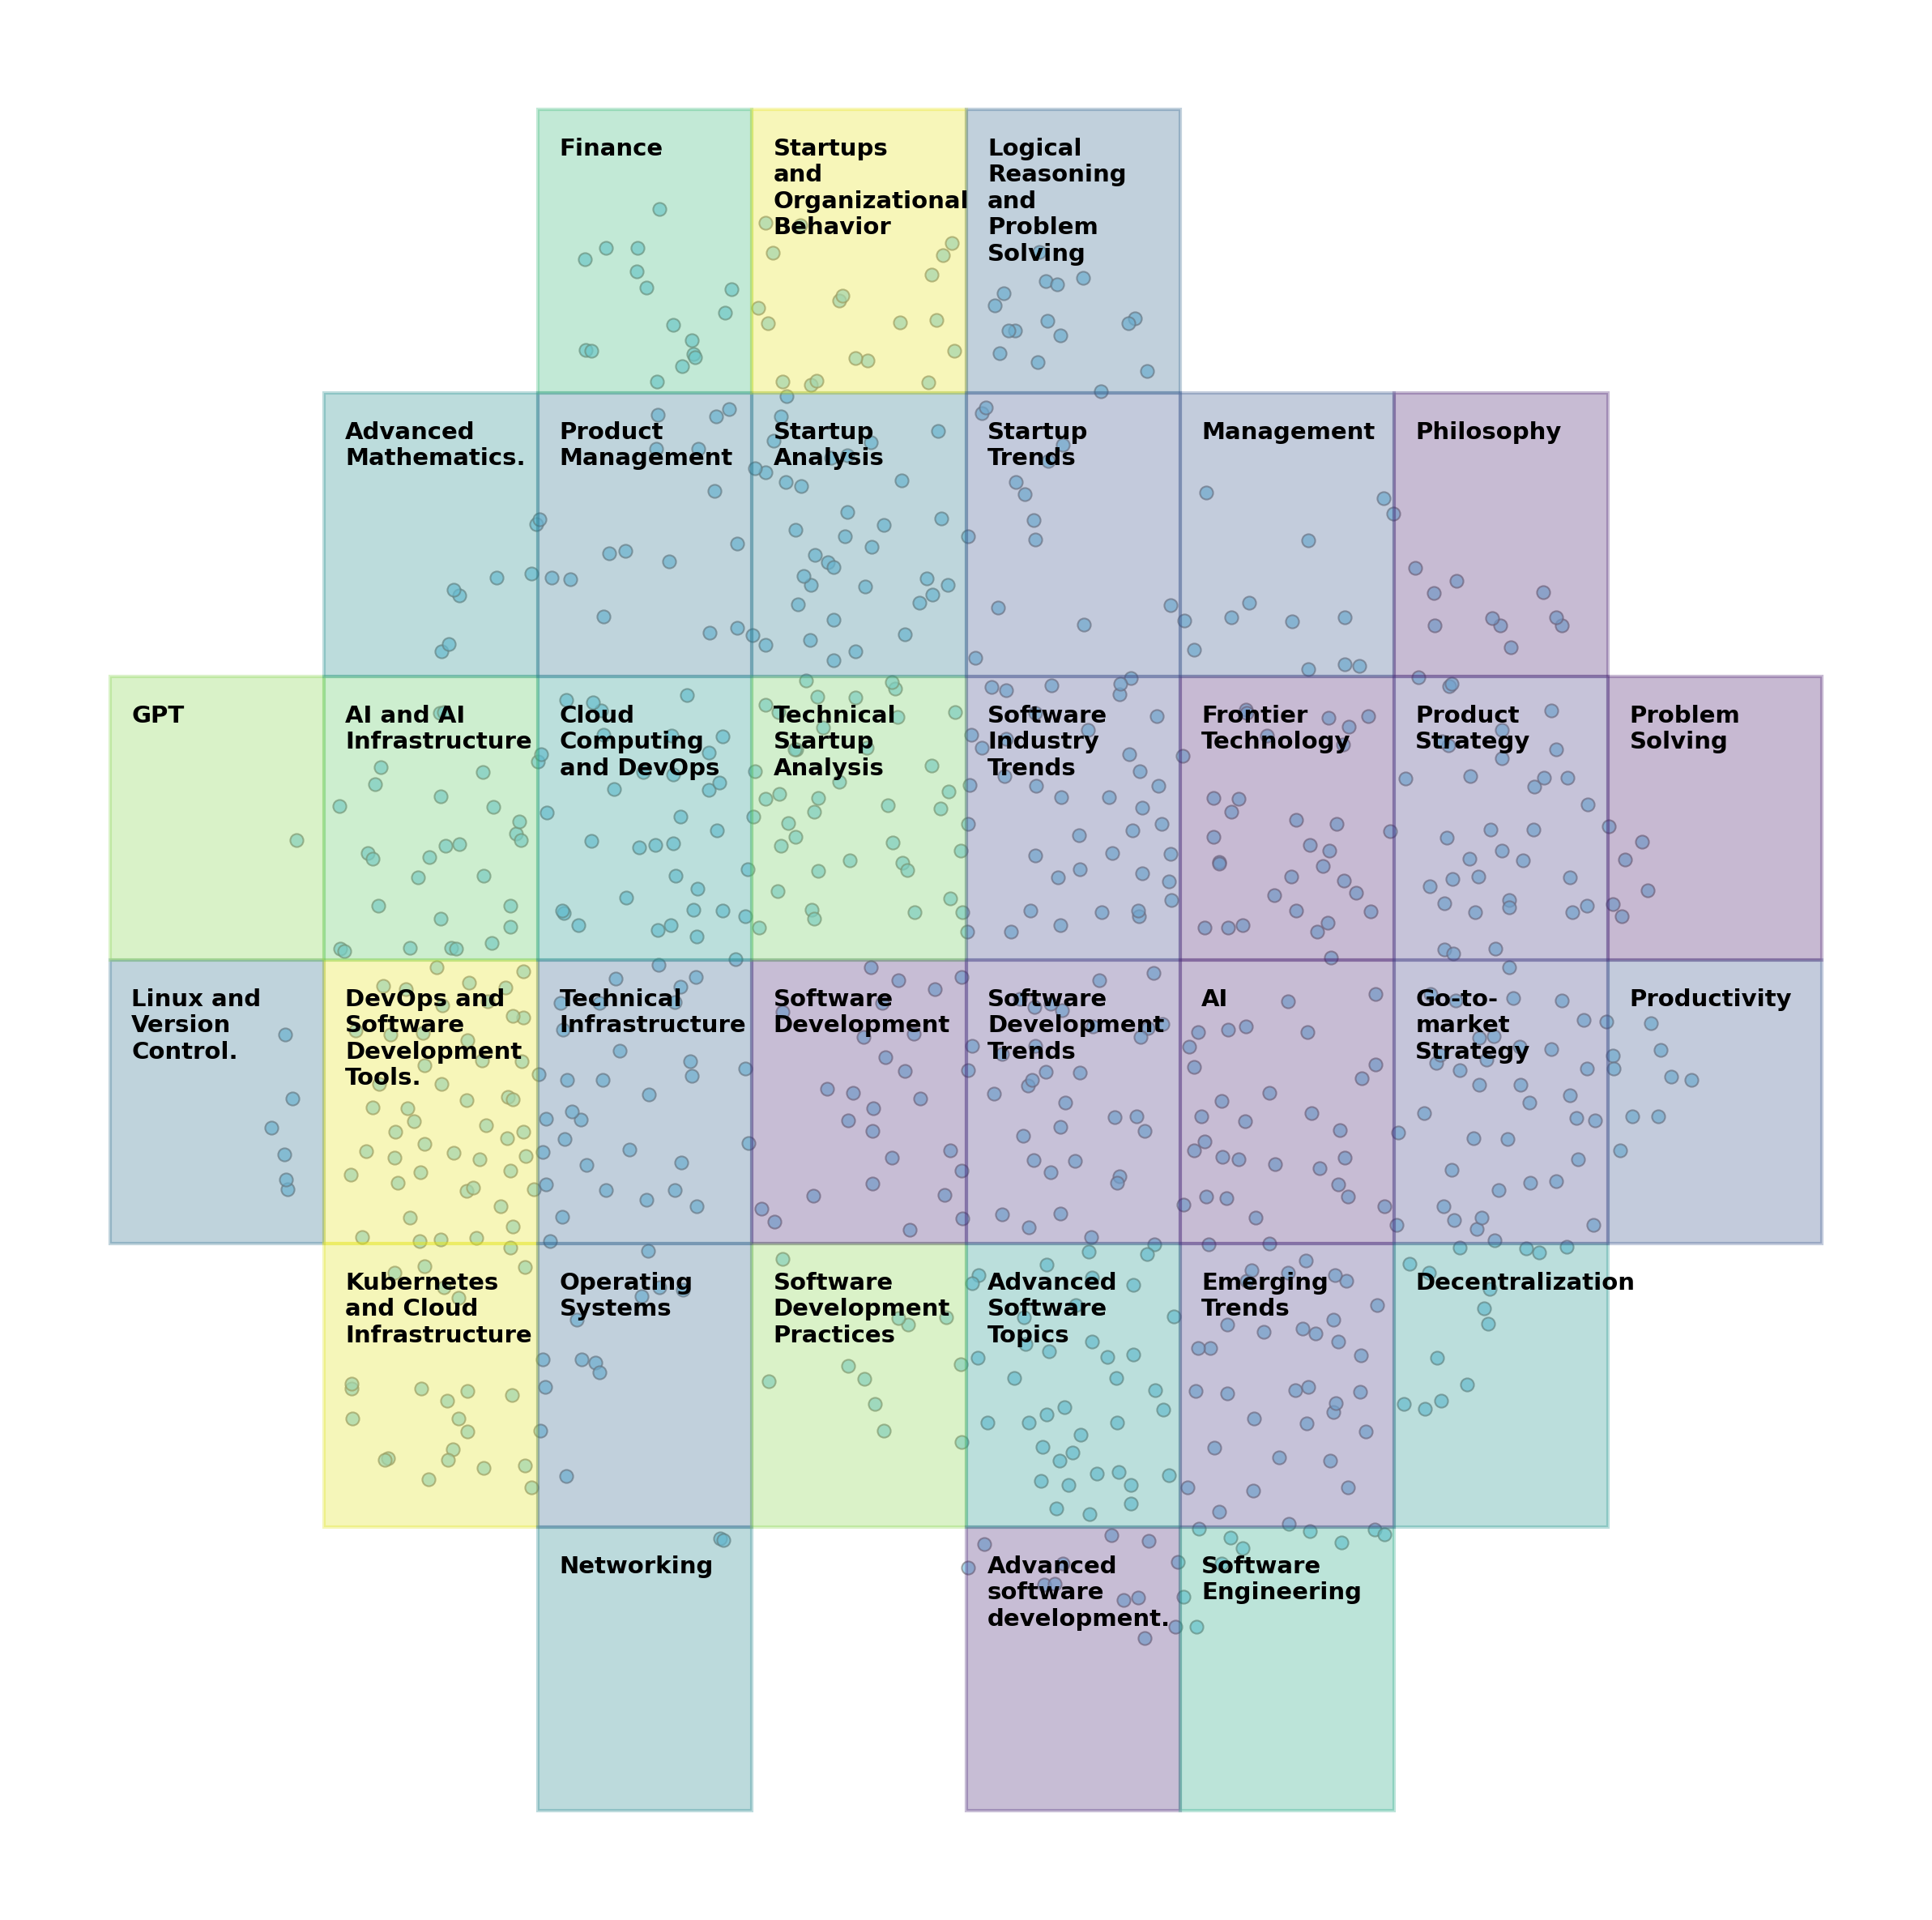

In [137]:
def plot_with_grid(embeddings_2d, metadata):
    # Create a new figure
    fig, ax = plt.subplots(figsize=(10,10), dpi=300)

    # Set the color map
    colormap = cm.get_cmap('viridis')

    # Plot the points
    scatter = ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], edgecolor='gray', c='skyblue', s=15, linewidths=0.5, alpha=0.7)
    
    # Iterate over the grid_dict and add a rectangle and text for each category
    for item in metadata:
        x_bounds = item["x_bounds"]
        y_bounds = item["y_bounds"]
        category = item["category"]
        # Calculate the width and height of the rectangle
        width = x_bounds[1] - x_bounds[0]
        height = y_bounds[1] - y_bounds[0]
        
        # Create a color based on the grid's hash value
        hash_object = hashlib.md5(str((x_bounds, y_bounds)).encode())
        color_index = int(hash_object.hexdigest(), 16) % 256
        color = colormap(color_index / 256)
        
        # Add a rectangle
        rectangle = patches.Rectangle((x_bounds[0], y_bounds[0]), width, height, linewidth=1, edgecolor=color,facecolor=color, alpha=0.3)
        ax.add_patch(rectangle)
        
        # Wrap the category text
        wrapped_category = textwrap.fill(category, width=10, break_long_words=False)

        # Add the category text at the top left of the rectangle with smaller font size
        ax.text(x_bounds[0]+1, y_bounds[1]-1, wrapped_category, ha='left', va='top', color='black', fontsize=7, wrap=True, fontweight='bold')

    ax.grid(False)
    ax.axis('off')
    fig.savefig('output/transparent_plot.png', transparent=True)

    # Show the plot
    plt.show()
# Call the function
plot_with_grid(embeddings_2d, metadata)

In [149]:
count_elements(embeddings_2d)

{'Q1': 148, 'Q2': 191, 'Q3': 181, 'Q4': 226}